# PubChem scraping 

The aim of this notebook is to extract the melting points of various molecules from the pubchem site. On the pubcehm website, all cids of molecules for which at least 1 melting point has been recorded are downloadable. The corresponding data are in PubChem_comp_with_mp_list_.xlsx. 



As the datasets obtained from this notebook will be used simply to get an idea of the model's performance, various approximations such as the exctraction of only 1 melting point per molecule, or taking an average if the melting point is given in a range, will be made.

## Scraping 

The aim now is to scrape the pubchem site to extract the melting points. To do this, we'll use the previously extracted cids and the fact that the pages referencing the melting point contain these cids. We will just loop through each page and extract the melting point. Here, to simplify the extraction, only the first value in the melting point table is extracted. 



The following code takes time to run, the result df is in the data folder. You can simply load it :

In [60]:
"""
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Get the list of CID
cid_list = base_df["cid"].to_list()

# Load the data
base_df = pd.read_excel("PubChem_comp_with_mp_list_.xlsx")

# Get the list of CID
cid_list = base_df["cid"].to_list()

driver = webdriver.Chrome()

# Initialize a df to store the data
df = pd.DataFrame(columns=['CID', 'mpC'])

# Loop to access each CID URL
for cid in cid_list[:2000]:
    url = f"https://pubchem.ncbi.nlm.nih.gov/compound/{cid}#section=Melting-Point&fullscreen=true"
    driver.get(url)
    
    try:
        # Wait for the Melting Point information to load and extract the melting point
        WebDriverWait(driver, 3).until(
            EC.visibility_of_element_located((By.CSS_SELECTOR, "#Melting-Point .break-words.space-y-1"))
        )
        melting_point = driver.find_element(By.CSS_SELECTOR, "#Melting-Point .break-words.space-y-1").text
        print(f"Accessed page: {url} - Melting Point: {melting_point}")
        
        new_row = pd.DataFrame({'CID': [cid], 'mpC': [melting_point]})
        df = pd.concat([df, new_row], ignore_index=True)
    except Exception as e:
        print(f"Failed to extract melting point for CID {cid}: {e}")
        new_row = pd.DataFrame({'CID': [cid], 'mpC': 'Not Found'})
        df = pd.concat([df, new_row], ignore_index=True)


# Close
driver.quit()
"""
import pandas as pd

#Load the data
df = pd.read_csv("PubChem_mpC.csv")

## Data cleaning

In [61]:
import matplotlib.pyplot as plt

In [72]:
import re

def extract_melting_point(melting_point):
    # Convert to lowercase and check for the presence of "decompose", "decomposes", "<", or ">"
    if any(keyword in melting_point.lower() for keyword in ["decompose", "<", ">"]):
        return None

    # Check for a range of temperatures, including possible negative values
    range_match = re.search(r"(-?\d+)\s*-\s*(-?\d+)\s*°C", melting_point)
    if range_match:
        # Calculate the mean of the range
        low_temp = float(range_match.group(1))
        high_temp = float(range_match.group(2))
        return (low_temp + high_temp) / 2
    else:
        # Check for a single temperature, including possible negative values
        single_match = re.search(r"(-?\d+)\s*°C", melting_point)
        if single_match:
            return float(single_match.group(1))
        else:
            return None  # Return None if no pattern matches

In [63]:
# Apply the function to the "mpC" column
df["mpC"] = df["mpC"].apply(extract_melting_point)

# Remove rows with missing values
df = df.dropna(subset=["mpC"])

In [64]:
df

,cid,complexity,inchi,isosmiles,canonicalsmiles,inchikey,iupacname,mpC
0,118856773,18600,InChI=1S/C287H440N80O111S6/c1-24-132(17)225-28...,CC[C@H](C)[C@H]1C(=O)N[C@H](C(=O)NCC(=O)N[C@H]...,CCC(C)C1C(=O)NC(C(=O)NCC(=O)NC(C(=O)NC(C(=O)NC...,FIBJDTSHOUXTKV-BRHMIFOHSA-N,(2S)-5-amino-2-[[(2S)-2-[[(2S)-2-[[(2S)-2-[[(2...,65.0
1,139600825,18600,InChI=1S/C287H440N80O111S6/c1-24-132(17)225-28...,CCC(C)C1C(=O)NC(C(=O)NCC(=O)NC(C(=O)NC(C(=O)NC...,CCC(C)C1C(=O)NC(C(=O)NCC(=O)NC(C(=O)NC(C(=O)NC...,FIBJDTSHOUXTKV-UHFFFAOYSA-N,5-amino-2-[[2-[[2-[[2-[[2-[[1-[2-[[2-[[2-[[2-[...,65.0
10,18772499,12900,InChI=1S/C228H382O191/c229-1-76-114(268)152(30...,C(C1C(C(C(C(O1)OC2(C(C(C(O2)CO)O)O)COC3(C(C(C(...,C(C1C(C(C(C(O1)OC2(C(C(C(O2)CO)O)O)COC3(C(C(C(...,JYJIGFIDKWBXDU-UHFFFAOYSA-N,2-[2-[[2-[[2-[[2-[[2-[[2-[[2-[[2-[[2-[[2-[[2-[...,178.0
13,16143525,3850,InChI=1S/C71H84N18O18S6/c1-14-37-63-82-43(22-1...,C/C=C\1/C2=NC(CS2)C(=O)NC(C3=NC(=CS3)C(=S)NC4C...,CC=C1C2=NC(CS2)C(=O)NC(C3=NC(=CS3)C(=S)NC4C(OC...,XLCGNZQPUQXSOY-ASKSIGGCSA-N,"2-[2-[[2-[(11Z)-18-(2,3-dihydroxybutan-2-yl)-1...",220.5
14,45267103,3790,InChI=1S/C96H135N19O16/c1-50(2)36-71(105-79(11...,C[C@@H](C(=O)N[C@H](C(C)C)C(=O)N[C@@H](C(C)C)C...,CC(C)CC(C(=O)NC(C)C(=O)NC(C(C)C)C(=O)NC(C(C)C)...,NDAYQJDHGXTBJL-MWWSRJDJSA-N,(2R)-2-[[2-[[(2S)-2-formamido-3-methylbutanoyl...,229.0
...,...,...,...,...,...,...,...,...
11986,7311726,47,"InChI=1S/C3H7NO2/c1-4-2-3(5)6/h4H,2H2,1H3,(H,5,6)",C[NH2+]CC(=O)[O-],C[NH2+]CC(=O)[O-],FSYKKLYZXJSNPZ-UHFFFAOYSA-N,2-(methylazaniumyl)acetate,208.0
11992,6327114,47,InChI=1S/C2H6O3P/c1-4-6(3)5-2/h1-2H3/q+1,CO[P+](=O)OC,CO[P+](=O)OC,YLFBFPXKTIQSSY-UHFFFAOYSA-N,dimethoxy(oxo)phosphanium,29.0
11995,305,46,"InChI=1S/C5H14NO/c1-6(2,3)4-5-7/h7H,4-5H2,1-3H...",C[N+](C)(C)CCO,C[N+](C)(C)CCO,OEYIOHPDSNJKLS-UHFFFAOYSA-N,2-hydroxyethyl(trimethyl)azanium,245.5
11998,18049,46,"InChI=1S/C6H14O2/c1-5(7)3-4-6(2)8/h5-8H,3-4H2,...",CC(CCC(C)O)O,CC(CCC(C)O)O,OHMBHFSEKCCCBW-UHFFFAOYSA-N,"hexane-2,5-diol",43.0


Let's see the distribution of the melting point to see if there is some bias in the pubchem data :

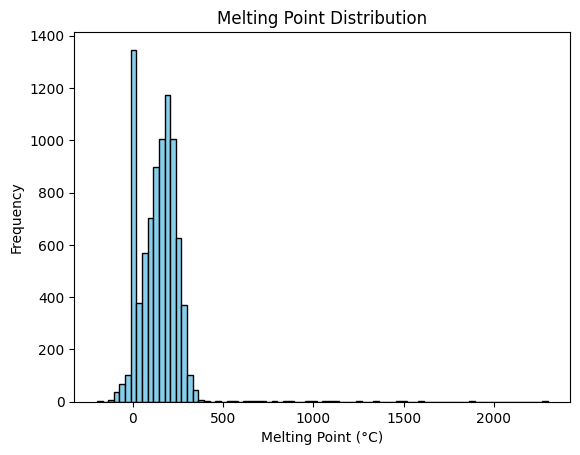

In [67]:
# Plot an histogram of the mpC values
plt.hist(df["mpC"], bins=80, color="skyblue", edgecolor="black")
plt.xlabel("Melting Point (°C)")
plt.ylabel("Frequency")
plt.title("Melting Point Distribution")
plt.show()


We observe a bias here, there's many values near 0

In [ ]:
# Remove salts